In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

In [2]:
ayetler = pd.read_csv("ayetler.csv")
sureler = pd.read_csv("sureler.csv")

In [3]:
ayetler.drop("Unnamed: 0",axis=1,inplace=True)
sureler.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
sureler

,sureAd,ayetSayi,inisSira
0,fatiha-suresi,7,5
1,bakara-suresi,286,87
2,aliimran-suresi,200,89
3,nisa-suresi,176,92
4,maide-suresi,120,112
...,...,...,...
109,nasr-suresi,3,114
110,tebbet-suresi,5,6
111,ihlas-suresi,4,22
112,felak-suresi,5,20


In [5]:
ayetler

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
0,abese-suresi,1,عَبَسَ وَتَوَلّٰىۙ,‘Abese ve tevellâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...",(Peygamber) Yüzünü ekşitti ve döndü.,"(The Prophet) frowned and turned away,"
1,abese-suresi,2,اَنْ جَٓاءَهُ الْاَعْمٰىۜ,En câehu-l-a’mâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...","Kendisine âmâ geldi, diye.",Because there came to him the blind man (inter...
2,abese-suresi,3,وَمَا يُدْر۪يكَ لَعَلَّهُ يَزَّكّٰىۙ,Vemâ yudrîke le’allehu yezzekkâ,"(Ey Muhammed!) Ne bilirsin, belki de o arınacak,","Ne bilirsin, belki o temizlenecek?",But what could tell thee but that perchance he...
3,abese-suresi,4,اَوْ يَذَّكَّرُ فَتَنْفَعَهُ الذِّكْرٰىۜ,Ev yeżżekkeru fetenfe’ahu-żżikrâ,Yahut öğüt alacak da bu öğüt kendisine fayda v...,Veya öğüt belleyecek de öğüt ona fayda verecek.,"Or that he might receive admonition, and the t..."
4,abese-suresi,5,اَمَّا مَنِ اسْتَغْنٰىۙ,Emmâ meni-staġnâ,Kendini muhtaç hissetmeyene gelince;,"Ama buna ihtiyaç hissetmeyene gelince,",As to one who regards Himself as selfsufficien...
...,...,...,...,...,...,...,...
6231,zumer-suresi,71,وَس۪يقَ الَّذ۪ينَ كَفَرُٓوا اِلٰى جَهَنَّمَ زُ...,Vesîka-lleżîne keferû ilâ cehenneme zumerâ(an)...,İnkâr edenler grup grup cehenneme sevk edilirl...,İnkâr edenler bölük bölük cehenneme sevkedilme...,The Unbelievers will be led to Hell in crowd: ...
6232,zumer-suresi,72,ق۪يلَ ادْخُلُٓوا اَبْوَابَ جَهَنَّمَ خَالِد۪ين...,Kîle-dḣulû ebvâbe cehenneme ḣâlidîne fîhâ(s) f...,Onlara şöyle denir: “İçinde ebedî kalmak üzere...,"(Onlara): ""Ebedî olarak içinde kalmak üzere gi...","(To them) will be said: ""Enter ye the gates of..."
6233,zumer-suresi,73,وَس۪يقَ الَّذ۪ينَ اتَّقَوْا رَبَّهُمْ اِلَى ال...,Vesîka-lleżîne-ttekav rabbehum ilâ-lcenneti zu...,Rablerine karşı gelmekten sakınanlar da grup g...,Rablerinden korkanlar da bölük bölük cennete s...,And those who feared their Lord will be led to...
6234,zumer-suresi,74,وَقَالُوا الْحَمْدُ لِلّٰهِ الَّذ۪ي صَدَقَنَا ...,Ve kâlû-lhamdu li(A)llâhi-lleżî sadekanâ va’de...,"Onlar şöyle derler: “Hamd, bize olan vaadini g...","Onlar da: ""Hamdolsun o Allah'a ki, bize vaadin...","They will say: ""Praise be to Allah, Who has tr..."


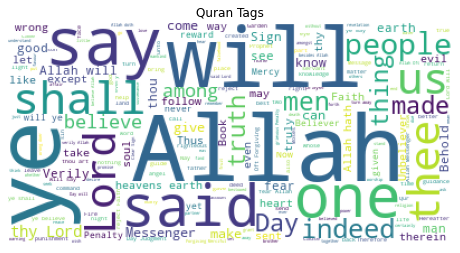

In [6]:
stop_words_en = get_stop_words('en')
stop_words_tr = get_stop_words('tr')

ingilizce = ""
for i in ayetler.ingilizceMeal:
    ingilizce +=i
    
plt.figure(figsize = (8,8))
wordcloud = WordCloud(
    stopwords=stop_words_en,
    background_color='White').generate(ingilizce)
plt.imshow(wordcloud)
plt.title("Quran Tags")
plt.axis('off')
plt.show()

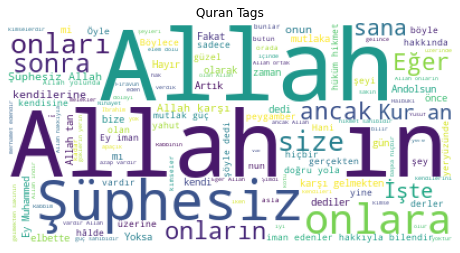

In [7]:
diyanetMeal = ""
for i in ayetler.diyanetMeal:
    diyanetMeal +=i
    
plt.figure(figsize = (8,8))
wordcloud = WordCloud(
    stopwords=stop_words_tr,
    background_color='White').generate(diyanetMeal)
plt.imshow(wordcloud)
plt.title("Quran Tags")
plt.axis('off')
plt.show()

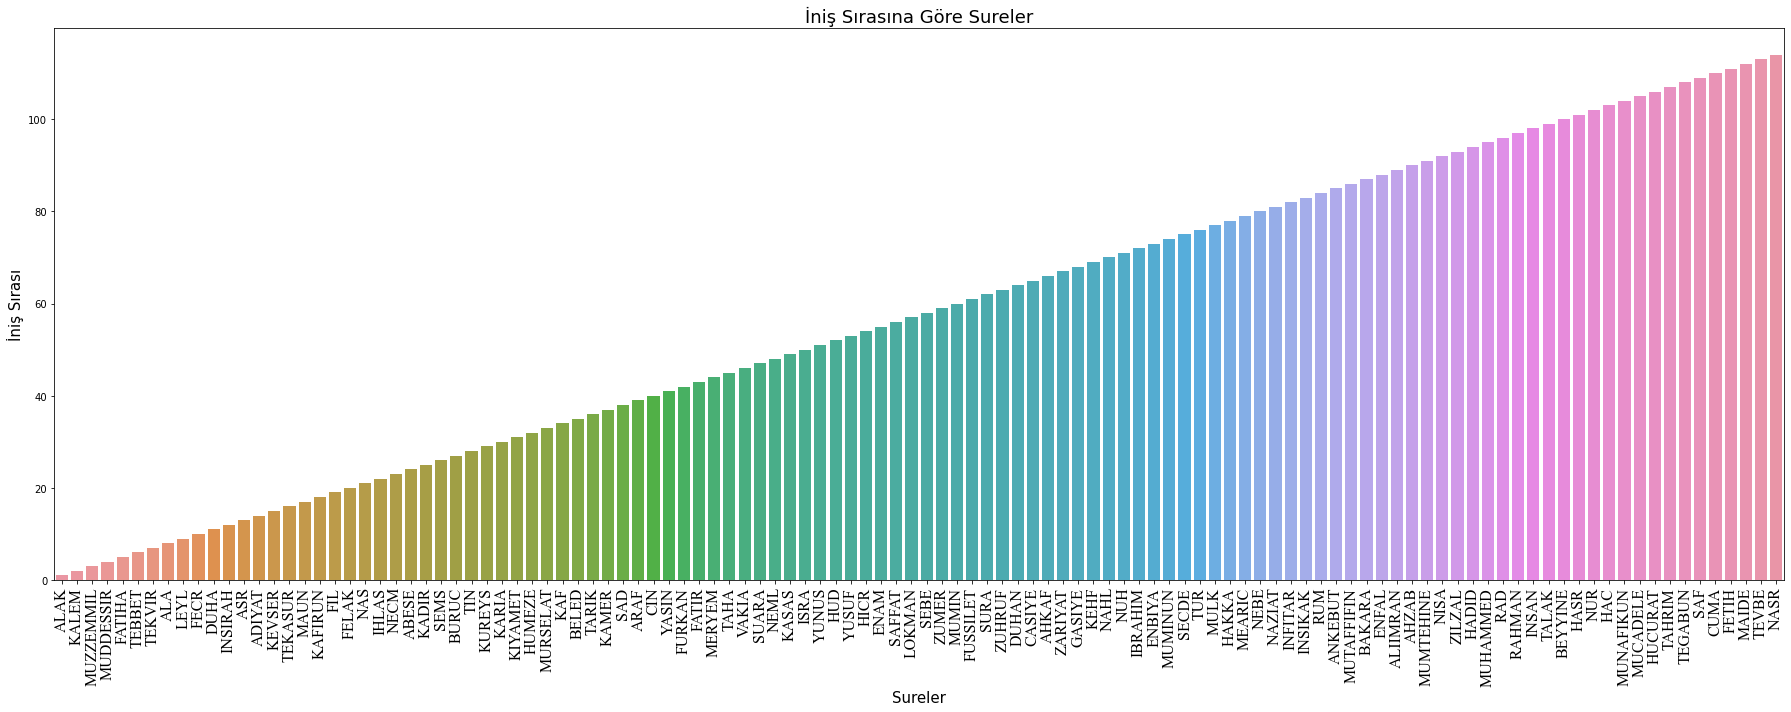

In [8]:
sureler.sureAd=sureler.sureAd.str.replace("-suresi","")
sureler.sureAd=sureler.sureAd.str.upper()
plt.figure(figsize=(25,10))
sns.barplot(x=sureler.sureAd,
            y=sureler.inisSira, 
            data=sureler, 
            order=sureler.sort_values('inisSira').sureAd)
# set labels
plt.xticks(rotation = 90,fontsize=16,fontname = "Times New Roman")
plt.xlabel("Sureler", size=15)
plt.ylabel("İniş Sırası", size=15)
plt.title("İniş Sırasına Göre Sureler", size=18)
plt.tight_layout()

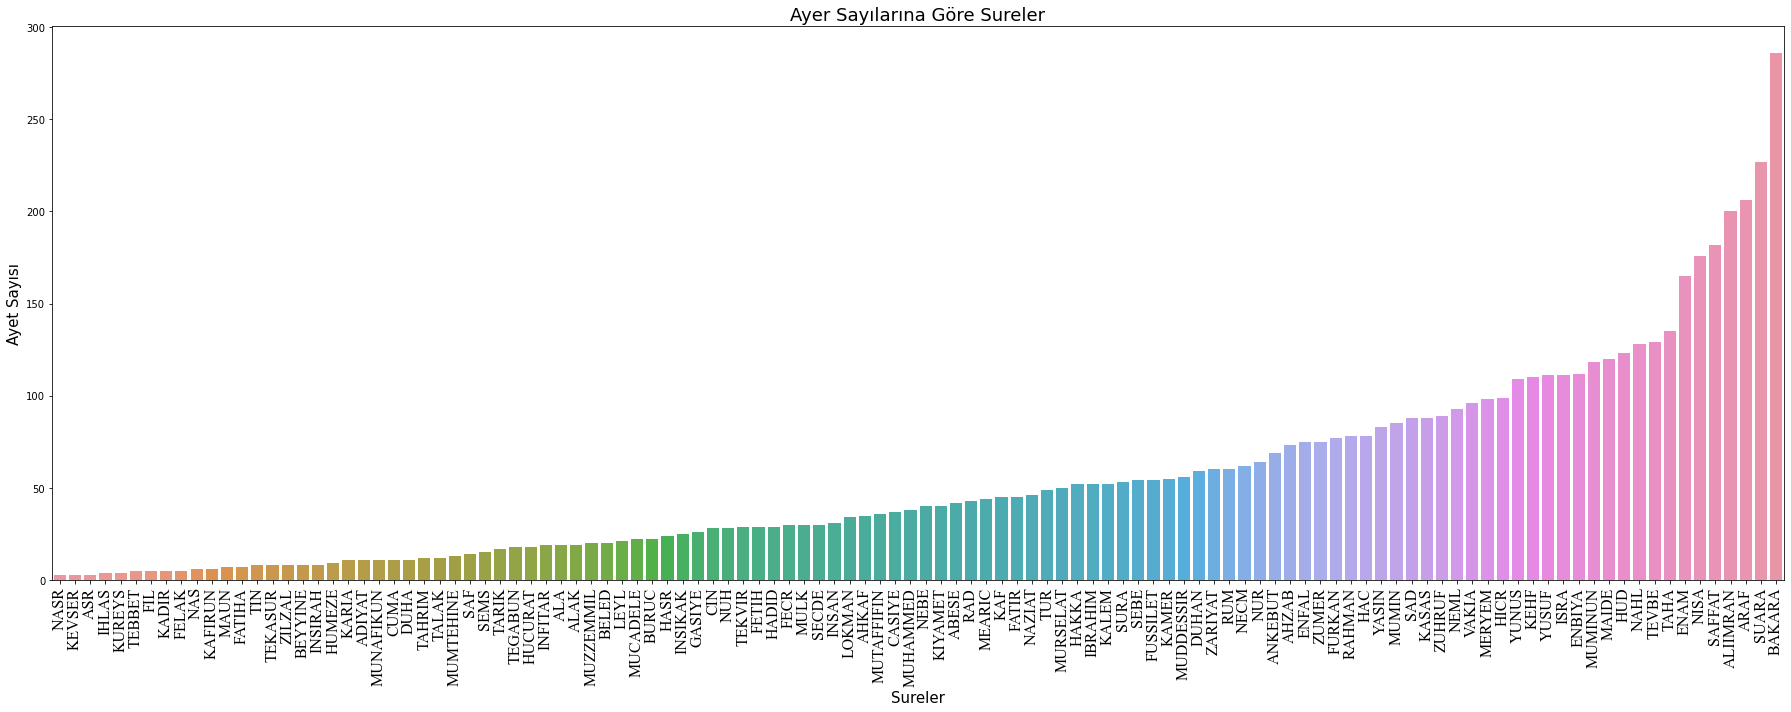

In [9]:
sureler.sureAd=sureler.sureAd.str.replace("-suresi","")
sureler.sureAd=sureler.sureAd.str.upper()
plt.figure(figsize=(25,10))
sns.barplot(x=sureler.sureAd,
            y=sureler.ayetSayi, 
            data=sureler, 
            order=sureler.sort_values('ayetSayi').sureAd)
# set labels
plt.xticks(rotation = 90,fontsize=16,fontname = "Times New Roman")
plt.xlabel("Sureler", size=15)
plt.ylabel("Ayet Sayısı", size=15)
plt.title("Ayer Sayılarına Göre Sureler", size=18)
plt.tight_layout()

In [10]:
ayetler.head()

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
0,abese-suresi,1,عَبَسَ وَتَوَلّٰىۙ,‘Abese ve tevellâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...",(Peygamber) Yüzünü ekşitti ve döndü.,"(The Prophet) frowned and turned away,"
1,abese-suresi,2,اَنْ جَٓاءَهُ الْاَعْمٰىۜ,En câehu-l-a’mâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...","Kendisine âmâ geldi, diye.",Because there came to him the blind man (inter...
2,abese-suresi,3,وَمَا يُدْر۪يكَ لَعَلَّهُ يَزَّكّٰىۙ,Vemâ yudrîke le’allehu yezzekkâ,"(Ey Muhammed!) Ne bilirsin, belki de o arınacak,","Ne bilirsin, belki o temizlenecek?",But what could tell thee but that perchance he...
3,abese-suresi,4,اَوْ يَذَّكَّرُ فَتَنْفَعَهُ الذِّكْرٰىۜ,Ev yeżżekkeru fetenfe’ahu-żżikrâ,Yahut öğüt alacak da bu öğüt kendisine fayda v...,Veya öğüt belleyecek de öğüt ona fayda verecek.,"Or that he might receive admonition, and the t..."
4,abese-suresi,5,اَمَّا مَنِ اسْتَغْنٰىۙ,Emmâ meni-staġnâ,Kendini muhtaç hissetmeyene gelince;,"Ama buna ihtiyaç hissetmeyene gelince,",As to one who regards Himself as selfsufficien...


In [11]:
ayetler.tail()

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
6231,zumer-suresi,71,وَس۪يقَ الَّذ۪ينَ كَفَرُٓوا اِلٰى جَهَنَّمَ زُ...,Vesîka-lleżîne keferû ilâ cehenneme zumerâ(an)...,İnkâr edenler grup grup cehenneme sevk edilirl...,İnkâr edenler bölük bölük cehenneme sevkedilme...,The Unbelievers will be led to Hell in crowd: ...
6232,zumer-suresi,72,ق۪يلَ ادْخُلُٓوا اَبْوَابَ جَهَنَّمَ خَالِد۪ين...,Kîle-dḣulû ebvâbe cehenneme ḣâlidîne fîhâ(s) f...,Onlara şöyle denir: “İçinde ebedî kalmak üzere...,"(Onlara): ""Ebedî olarak içinde kalmak üzere gi...","(To them) will be said: ""Enter ye the gates of..."
6233,zumer-suresi,73,وَس۪يقَ الَّذ۪ينَ اتَّقَوْا رَبَّهُمْ اِلَى ال...,Vesîka-lleżîne-ttekav rabbehum ilâ-lcenneti zu...,Rablerine karşı gelmekten sakınanlar da grup g...,Rablerinden korkanlar da bölük bölük cennete s...,And those who feared their Lord will be led to...
6234,zumer-suresi,74,وَقَالُوا الْحَمْدُ لِلّٰهِ الَّذ۪ي صَدَقَنَا ...,Ve kâlû-lhamdu li(A)llâhi-lleżî sadekanâ va’de...,"Onlar şöyle derler: “Hamd, bize olan vaadini g...","Onlar da: ""Hamdolsun o Allah'a ki, bize vaadin...","They will say: ""Praise be to Allah, Who has tr..."
6235,zumer-suresi,75,وَتَرَى الْمَلٰٓئِكَةَ حَٓافّ۪ينَ مِنْ حَوْلِ ...,Veterâ-lmelâ-ikete hâffîne min havli-l’arşi yu...,"Melekleri de, Rablerini hamd ile tesbih edip y...","Meleklerin de arşın etrafını kuşatarak, Rabler...",And thou wilt see the angels surrounding the T...


In [12]:
ayetler.describe()

,sureAyetNo
count,6236.000000
mean,53.506575
std,50.463924
min,1.000000
25%,16.000000
50%,38.000000
75%,75.000000
max,286.000000


In [13]:
sureler.head()

,sureAd,ayetSayi,inisSira
0,FATIHA,7,5
1,BAKARA,286,87
2,ALIIMRAN,200,89
3,NISA,176,92
4,MAIDE,120,112


In [14]:
sureler.tail()

,sureAd,ayetSayi,inisSira
109,NASR,3,114
110,TEBBET,5,6
111,IHLAS,4,22
112,FELAK,5,20
113,NAS,6,21


In [15]:
sureler.describe()

,ayetSayi,inisSira
count,114.000000,114.000000
mean,54.701754,57.500000
std,53.213367,33.052988
min,3.000000,1.000000
25%,15.500000,29.250000
50%,39.000000,57.500000
75%,77.750000,85.750000
max,286.000000,114.000000


In [16]:
ilkInenSureAd = sureler.loc[sureler['inisSira'] == 1].sureAd
print(ilkInenSureAd)

95    ALAK
Name: sureAd, dtype: object


In [17]:
sonInenSureAd = sureler.loc[sureler['inisSira'] == 114].sureAd
print(sonInenSureAd)

109    NASR
Name: sureAd, dtype: object


In [18]:
alakSuresi=ayetler.loc[ayetler['sureAd'] == "alak-suresi"]
print("**************İlk İnen Ayet**************\n")
print("Arapça: "+alakSuresi.arapca.iloc[0])
print("Türkçe Okunuşu: "+alakSuresi.turkceOkunus.iloc[0])
print("Diyanet Meali: "+alakSuresi.diyanetMeal.iloc[0])
print("Elmalılı Muhammed Hamdi Yazır Meali: "+alakSuresi.elmamliliMeal.iloc[0])
print("İngilizce Meali: "+alakSuresi.ingilizceMeal.iloc[0])

**************İlk İnen Ayet**************

Arapça: اِقْرَأْ بِاسْمِ رَبِّكَ الَّذ۪ي خَلَقَۚ 
Türkçe Okunuşu: İkra/ bi-ismi rabbike-lleżî ḣalak(e)
Diyanet Meali: 1,2. Yaratan Rabbinin adıyla oku! O, insanı “alak”dan yarattı.
Elmalılı Muhammed Hamdi Yazır Meali: Yaratan Rabbinin adıyla oku!
İngilizce Meali: Proclaim! (or Read!) in the name of thy Lord and Cherisher, Who created-


In [19]:
nasrSuresi=ayetler.loc[ayetler['sureAd'] == "nasr-suresi"]
print("**************Son İnen Ayet**************\n")
print("Arapça: "+nasrSuresi.arapca.iloc[-1])
print("Türkçe Okunuşu: "+nasrSuresi.turkceOkunus.iloc[-1])
print("Diyanet Meali: "+nasrSuresi.diyanetMeal.iloc[-1])
print("Elmalılı Muhammed Hamdi Yazır Meali: "+nasrSuresi.elmamliliMeal.iloc[-1])
print("İngilizce Meali: "+nasrSuresi.ingilizceMeal.iloc[-1])

**************Son İnen Ayet**************

Arapça: فَسَبِّحْ بِحَمْدِ رَبِّكَ وَاسْتَغْفِرْهُۜ اِنَّهُ كَانَ تَوَّابًا 
Türkçe Okunuşu: Fesebbih bihamdi rabbike vestaġfirh(u)(c) innehu kâne tevvâbâ(n)
Diyanet Meali: 1,2,3. Allah’ın yardımı ve fetih (Mekke fethi) geldiğinde ve insanların bölük bölük Allah’ın dinine girdiğini gördüğünde, Rabbine hamd ederek tespihte bulun ve O’ndan bağışlama dile. Çünkü O, tövbeleri çok kabul edendir.
Elmalılı Muhammed Hamdi Yazır Meali: Rabbini öğerek tesbih et, O'ndan bağışlanmanı dile, çünkü O, tevbeleri çok kabul edendir.
İngilizce Meali: Celebrate the praises of thy Lord, and pray for His Forgiveness: For He is Oft-Returning (in Grace and Mercy).


In [20]:
ilkSureAd = sureler.loc[0].sureAd
print(ilkSureAd)

FATIHA


In [21]:
fatihaSuresi=ayetler.loc[ayetler['sureAd'] == "fatiha-suresi"]
fatihaSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
1511,fatiha-suresi,1,بِسْمِ اللَّهِ الرَّحْمٰنِ الرَّحِيمِ,Bismi(A)llâhi-rrahmâni-rrahîm(i),Bismillâhirrahmânirrahîm.,Rahmân ve Rahîm olan Allah'ın ismiyle.,"In the name of Allah, Most Gracious, Most Merc..."
1512,fatiha-suresi,2,اَلْحَمْدُ لِلّٰهِ رَبِّ الْعَالَم۪ينَۙ,Elhamdu li(A)llâhi rabbi-l’âlemîn(e),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","Hamd o âlemlerin Rabbi,","Praise be to Allah, the Cherisher and Sustaine..."
1513,fatiha-suresi,3,اَلرَّحْمٰنِ الرَّح۪يمِۙ,Errahmâni-rrahîm(i),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","O Rahmân ve Rahim,","Most Gracious, Most Merciful;"
1514,fatiha-suresi,4,مَالِكِ يَوْمِ الدّ۪ينِۜ,Mâliki yevmi-ddîn(i),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","O, din gününün maliki Allah'ın.",Master of the Day of Judgment.
1515,fatiha-suresi,5,اِيَّاكَ نَعْبُدُ وَاِيَّاكَ نَسْتَع۪ينُۜ,İyyâke na’budu ve-iyyâke nesta’în(u),(Allahım!) Yalnız sana ibadet ederiz ve yalnız...,"Ancak sana ederiz kulluğu, ibadeti ve ancak se...","Thee do we worship, and Thine aid we seek."
1516,fatiha-suresi,6,اِهْدِنَا الصِّرَاطَ الْمُسْتَق۪يمَۙ,İhdinâ-ssirâta-lmustakîm(e),"6,7. Bizi doğru yola, kendilerine nimet verdik...","Hidayet eyle bizi doğru yola,","Show us the straight way,"
1517,fatiha-suresi,7,صِرَاطَ الَّذ۪ينَ اَنْعَمْتَ عَلَيْهِمْۙ غَيْر...,Sirâta-lleżîne en’amte ‘aleyhim ġayri-lmaġdûbi...,"6,7. Bizi doğru yola, kendilerine nimet verdik...",O kendilerine nimet verdiğin mutlu kimselerin ...,The way of those on whom Thou hast bestowed Th...


In [22]:
sonSureAd = sureler.loc[113].sureAd
print(sonSureAd)

NAS


In [23]:
nasSuresi=ayetler.loc[ayetler['sureAd'] == "nas-suresi"]
nasSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
3821,nas-suresi,1,قُلْ اَعُوذُ بِرَبِّ النَّاسِۙ,Kul e’ûżu birabbi-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","De ki: Sığınırım ben insanların Rabbine,",Say: I seek refuge with the Lord and Cherisher...
3822,nas-suresi,2,مَلِكِ النَّاسِۙ,Meliki-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","İnsanların hükümdârına,","The King (or Ruler) of Mankind,"
3823,nas-suresi,3,اِلٰهِ النَّاسِۙ,İlâhi-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","İnsanların ilâhına,","The Allah (for judge) of Mankind,-"
3824,nas-suresi,4,مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِۙ,Min şerri-lvesvâsi-lḣannâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...",O sinsi vesvesecinin şerrinden.,"From the mischief of the Whisperer (of Evil), ..."
3825,nas-suresi,5,اَلَّذ۪ي يُوَسْوِسُ ف۪ي صُدُورِ النَّاسِۙ,Elleżî yuvesvisu fî sudûri-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","O ki, insanların göğüslerine vesveseler fısıldar.",(The same) who whispers into the hearts of Man...
3826,nas-suresi,6,مِنَ الْجِنَّةِ وَالنَّاسِ,Mine-lcinneti ve-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","Gerek cinlerden, gerek insanlardan.",Among Jinns and among Men.


In [24]:
bakaraSuresi = ayetler.loc[ayetler['sureAd'] == "bakara-suresi"]
bakaraSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
677,bakara-suresi,1,الٓمٓۚ,Elif-lâm-mîm,Elif Lâm Mîm.,"(Elif, Lâm, Mîm.)",A.L.M..
678,bakara-suresi,2,ذٰلِكَ الْكِتَابُ لَا رَيْبَۚۛ ف۪يهِۚۛ هُدًى ل...,Żâlike-lkitâbu lâ raybe(*) fîhi(*) huden lilmu...,"Bu, kendisinde şüphe olmayan kitaptır. Allah’a...","İşte o kitap, bunda şüphe yok, müttakiler (köt...","This is the Book; in it is guidance sure, with..."
679,bakara-suresi,3,اَلَّذ۪ينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُق۪يمُون...,Elleżîne yu/minûne bilġaybi veyukîmûne-ssalâte...,"Onlar gaybe inanırlar, namazı dosdoğru kılarla...",Onlar ki gaybe iman edip namazı dürüst kılarla...,"Who believe in the Unseen, are steadfast in pr..."
680,bakara-suresi,4,وَالَّذ۪ينَ يُؤْمِنُونَ بِمَٓا اُنْزِلَ اِلَيْ...,Velleżîne yu/minûne bimâ unzile ileyke vemâ un...,"Onlar sana indirilene de, senden önce indirile...","Ve onlar ki hem sana indirilene iman ederler, ...",And who believe in the Revelation sent to thee...
681,bakara-suresi,5,اُو۬لٰٓئِكَ عَلٰى هُدًى مِنْ رَبِّهِمْ وَاُو۬ل...,Ulâ-ike ‘alâ huden min rabbihim(s) ve ulâ-ike ...,İşte onlar Rab’lerinden (gelen) bir doğru yol ...,"Bunlar, işte Rabblerinden bir hidayet üzerinde...","They are on (true) guidance, from their Lord, ..."
...,...,...,...,...,...,...,...
958,bakara-suresi,282,يَٓا اَيُّهَا الَّذ۪ينَ اٰمَنُٓوا اِذَا تَدَاي...,Yâ eyyuhe-lleżîne âmenû iżâ tedâyentum bideyni...,Ey iman edenler! Belli bir süre için birbirini...,Ey iman edenler! Belli bir vade ile karşılıklı...,O ye who believe! When ye deal with each other...
959,bakara-suresi,283,وَاِنْ كُنْتُمْ عَلٰى سَفَرٍ وَلَمْ تَجِدُوا ك...,Ve-in kuntum ‘alâ seferin velem tecidû kâtiben...,Eğer yolculukta olur da bir yazıcı bulamazsanı...,Şayet siz sefer üzere olur bir kâtip de bulama...,"If ye are on a journey, and cannot find a scri..."
960,bakara-suresi,284,لِلّٰهِ مَا فِي السَّمٰوَاتِ وَمَا فِي الْاَرْ...,li(A)llâhi mâ fî-ssemâvâti vemâ fi-l-ard(i)(k)...,"Göklerdeki her şey, yerdeki her şey Allah’ındı...","Göklerde ne var, yerde ne varsa hepsi Allah'ın...",To Allah belongeth all that is in the heavens ...
961,bakara-suresi,285,اٰمَنَ الرَّسُولُ بِمَٓا اُنْزِلَ اِلَيْهِ مِن...,âmene-rrasûlu bimâ unzile ileyhi min rabbihi v...,"Peygamber, Rabbinden kendisine indirilene iman...","Peygamber, Rabbi'nden kendisine ne indirildiys...",The Messenger believeth in what hath been reve...


In [25]:
pd.options.display.max_colwidth = 1000000000
ayetelKursiArapca=bakaraSuresi.iloc[254 : 255].arapca.to_string(index=False)
ayetelKursiTurkceOkunus=bakaraSuresi.iloc[254 : 255].turkceOkunus.to_string(index=False)
ayetelKursiDiyanetMeal=bakaraSuresi.iloc[254 : 255].diyanetMeal.to_string(index=False)
ayetelKursiElmaliliMeal=bakaraSuresi.iloc[254 : 255].elmamliliMeal.to_string(index=False)
ayetelKursiIngilizceMeal=bakaraSuresi.iloc[254 : 255].ingilizceMeal.to_string(index=False)
print("********************************************************Ayetel Kursi*******************************************************\n")
print("Arapça:\n"+ayetelKursiArapca+"\n")
print("Türkçe Okunuş:\n"+ayetelKursiTurkceOkunus+"\n")
print("Diyanet Meali:\n"+ayetelKursiDiyanetMeal+"\n")
print("Elmalılı Muhammed Hamdi Yazır Meali:\n"+ayetelKursiElmaliliMeal+"\n")
print("İngilizce Meali:\n"+ayetelKursiIngilizceMeal+"\n")

********************************************************Ayetel Kursi*******************************************************

Arapça:
 اَللّٰهُ لَٓا اِلٰهَ اِلَّا هُوَۚ اَلْحَيُّ الْقَيُّومُۚ لَا تَأْخُذُهُ سِنَةٌ وَلَا نَوْمٌۜ لَهُ مَا فِي السَّمٰوَاتِ وَمَا فِي الْاَرْضِۜ مَنْ ذَا الَّذ۪ي يَشْفَعُ عِنْدَهُٓ اِلَّا بِاِذْنِه۪ۜ يَعْلَمُ مَا بَيْنَ اَيْد۪يهِمْ وَمَا خَلْفَهُمْۚ وَلَا يُح۪يطُونَ بِشَيْءٍ مِنْ عِلْمِه۪ٓ اِلَّا بِمَا شَٓاءَۚ وَسِعَ كُرْسِيُّهُ السَّمٰوَاتِ وَالْاَرْضَۚ وَلَا يَؤُ۫دُهُ حِفْظُهُمَاۚ وَهُوَ الْعَلِيُّ الْعَظ۪يمُ 

Türkçe Okunuş:
 (A)llâhu lâ ilâhe illâ huve-lhayyu-lkayyûm(u)(c) lâ te/ḣużuhu sinetun velâ nevm(un)(c) lehu mâ fî-ssemâvâti vemâ fi-l-ard(i)(k) men że-lleżî yeşfe’u ‘indehu illâ bi-iżnih(i)(c) ya’lemu mâ beyne eydîhim vemâ ḣalfehum(s) velâ yuhîtûne bişey-in min ‘ilmihi illâ bimâ şâ(e)(c) vesi’a kursiyyuhu-ssemâvâti vel-ard(a)(s) velâ yeûduhu hifzuhumâ vehuve-l’aliyyu-l’azîm(u)

Diyanet Meali:
 Allah, kendisinden başka hiçbir ilâh olmayandır. Diridir,

In [26]:
amenerrasuluArapca=bakaraSuresi.iloc[284 : 286].arapca.to_string(index=False)
amenerrasuluTurkceOkunus=bakaraSuresi.iloc[284 : 286].turkceOkunus.to_string(index=False)
amenerrasuluDiyanetMeal=bakaraSuresi.iloc[284 : 286].diyanetMeal.to_string(index=False)
amenerrasuluElmaliliMeal=bakaraSuresi.iloc[284 : 286].elmamliliMeal.to_string(index=False)
amenerrasuluIngilizceMeal=bakaraSuresi.iloc[284 : 286].ingilizceMeal.to_string(index=False)
print("********************************************************Amenerrasulü*******************************************************\n")
print("Arapça:\n"+amenerrasuluArapca+"\n")
print("Türkçe Okunuş:\n"+amenerrasuluTurkceOkunus+"\n")
print("Diyanet Meali:\n"+amenerrasuluDiyanetMeal+"\n")
print("Elmalılı Muhammed Hamdi Yazır Meali:\n"+amenerrasuluElmaliliMeal+"\n")
print("İngilizce Meali:\n"+amenerrasuluIngilizceMeal+"\n")

********************************************************Amenerrasulü*******************************************************

Arapça:
                                                                                                                                                               اٰمَنَ الرَّسُولُ بِمَٓا اُنْزِلَ اِلَيْهِ مِنْ رَبِّه۪ وَالْمُؤْمِنُونَۜ كُلٌّ اٰمَنَ بِاللّٰهِ وَمَلٰٓئِكَتِه۪ وَكُتُبِه۪ وَرُسُلِه۪ۜ لَا نُفَرِّقُ بَيْنَ اَحَدٍ مِنْ رُسُلِه۪۠ وَقَالُوا سَمِعْنَا وَاَطَعْنَا غُفْرَانَكَ رَبَّنَا وَاِلَيْكَ الْمَص۪يرُ 
 لَا يُكَلِّفُ اللّٰهُ نَفْسًا اِلَّا وُسْعَهَاۜ لَهَا مَا كَسَبَتْ وَعَلَيْهَا مَا اكْتَسَبَتْۜ رَبَّنَا لَا تُؤَاخِذْنَٓا اِنْ نَس۪ينَٓا اَوْ اَخْطَأْنَاۚ رَبَّنَا وَلَا تَحْمِلْ عَلَيْنَٓا اِصْرًا كَمَا حَمَلْتَهُ عَلَى الَّذ۪ينَ مِنْ قَبْلِنَاۚ رَبَّنَا وَلَا تُحَمِّلْنَا مَا لَا طَاقَةَ لَنَا بِه۪ۚ وَاعْفُ عَنَّا۠ وَاغْفِرْ لَنَا۠ وَارْحَمْنَا۠ اَنْتَ مَوْلٰينَا فَانْصُرْنَا عَلَى الْقَوْمِ الْكَافِر۪ينَ 

Türkçe Okunuş:
                       

In [27]:
insirahSuresi=ayetler.loc[ayetler['sureAd'] == "insirah-suresi"]
insirahSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
2352,insirah-suresi,1,اَلَمْ نَشْرَحْ لَكَ صَدْرَكَۙ,Elem neşrah leke sadrak(e),(Ey Muhammed!) Senin göğsünü açıp genişletmedik mi?,Biz senin için (mutluluğun) göğsünü açmadık mı?,Have We not expanded thee thy breast?-
2353,insirah-suresi,2,وَوَضَعْنَا عَنْكَ وِزْرَكَۙ,Ve veda’nâ ‘anke vizrak(e),"2,3. Belini büken yükünü üzerinden kaldırmadık mı?",Senden yükünü indirmedik mi?,And removed from thee thy burden
2354,insirah-suresi,3,اَلَّذ۪ٓي اَنْقَضَ ظَهْرَكَۙ,Elleżî enkada zahrak(e),"2,3. Belini büken yükünü üzerinden kaldırmadık mı?",O senin sırtını ezen yükü.,The which did gall thy back?-
2355,insirah-suresi,4,وَرَفَعْنَا لَكَ ذِكْرَكَۜ,Ve rafa’nâ leke żikrak(e),Senin şânını yükseltmedik mi?,Senin şanını yüceltmedik mi?,And raised high the esteem (in which) thou (art held)?
2356,insirah-suresi,5,فَاِنَّ مَعَ الْعُسْرِ يُسْرًاۙ,Fe-inne me’a-l’usri yusrâ(n),Şüphesiz güçlükle beraber bir kolaylık vardır.,"Demek ki, zorlukla beraber bir kolaylık vardır.","So, verily, with every difficulty, there is relief:"
2357,insirah-suresi,6,اِنَّ مَعَ الْعُسْرِ يُسْرًاۜ,İnne me’a-l’usri yusrâ(n),"Gerçekten, güçlükle beraber bir kolaylık vardır.","Evet, zorlukla beraber bir kolaylık vardır.","Verily, with every difficulty there is relief."
2358,insirah-suresi,7,فَاِذَا فَرَغْتَ فَانْصَبْۙ,Fe-iżâ feraġte fensab,"Öyleyse, bir işi bitirince diğerine koyul.","O halde boş kaldın mı, yine kalk (başka bir iş ve ibadetle) yorul.","Therefore, when thou art free (from thine immediate task), still labour hard,"
2359,insirah-suresi,8,وَاِلٰى رَبِّكَ فَارْغَبْ,Ve-ilâ rabbike ferġab,Ancak Rabbine yönel ve yalvar.,Ancak Rabbine yönel.,And to thy Lord turn (all) thy attention.


In [28]:
kariaSuresi=ayetler.loc[ayetler['sureAd'] == "karia-suresi"]
kariaSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
2634,karia-suresi,1,اَلْقَارِعَةُۙ,El-kâri’a(tu),Yürekleri hoplatan büyük felaket!,"1,2,3. Kâria! (Çarpacak kıyamet) Nedir o kâria? Kârianın ne olduğunu sen bilir misin?",The (Day) of Noise and Clamour:
2635,karia-suresi,2,مَا الْقَارِعَةُۚ,Mâ-lkâri’a(tu),Nedir o yürekleri hoplatan büyük felaket?,"1,2,3. Kâria! (Çarpacak kıyamet) Nedir o kâria? Kârianın ne olduğunu sen bilir misin?",What is the (Day) of Noise and Clamour?
2636,karia-suresi,3,وَمَٓا اَدْرٰيكَ مَا الْقَارِعَةُۜ,Vemâ edrâke mâ-lkâri’a(tu),Yürekleri hoplatan büyük felaketin ne olduğunu sen ne bileceksin?,"1,2,3. Kâria! (Çarpacak kıyamet) Nedir o kâria? Kârianın ne olduğunu sen bilir misin?",And what will explain to thee what the (Day) of Noise and Clamour is?
2637,karia-suresi,4,يَوْمَ يَكُونُ النَّاسُ كَالْفَرَاشِ الْمَبْثُوثِۙ,Yevme yekûnu-nnâsu kelferâşi-lmebśûś(i),"O gün insanlar, her biri bir tarafa uçuşan küçük kelebekler gibi olacaktır.",O gün insanlar yayılmış pervaneler gibi olurlar.,"(It is) a Day whereon men will be like moths scattered about,"
2638,karia-suresi,5,وَتَكُونُ الْجِبَالُ كَالْعِهْنِ الْمَنْفُوشِۜ,Ve tekûnu-lcibâlu kel’ihni-lmenfûş(i),Dağlar da atılmış renkli yünler gibi olacaktır.,Dağlar atılmış renkli yünler gibi olur.,And the mountains will be like carded wool.
2639,karia-suresi,6,فَاَمَّا مَنْ ثَقُلَتْ مَوَاز۪ينُهُۙ,Fe-emmâ men śekulet mevâzînuh(u),"İşte o vakit, kimin tartıları ağır gelmişse,","6,7. O gün kimin tartıları ağır basarsa o, hoşnut olacağı bir hayat içindedir.","Then, he whose balance (of good deeds) will be (found) heavy,"
2640,karia-suresi,7,فَهُوَ ف۪ي ع۪يشَةٍ رَاضِيَةٍۜ,Fehuve fî ‘îşetin râdiye(tin),"Artık o, hoşnut olacağı bir hayat içinde olacaktır.","6,7. O gün kimin tartıları ağır basarsa o, hoşnut olacağı bir hayat içindedir.",Will be in a life of good pleasure and Satisfaction.
2641,karia-suresi,8,وَاَمَّا مَنْ خَفَّتْ مَوَاز۪ينُهُۙ,Ve emmâ men ḣaffet mevâzînuh(u),"Ama kimin de tartıları hafif gelirse,","8,9. Kimin tartıları hafif gelirse, onun anası da (varacağı yer, sığınacağı durağı) hâviye (uçurum)dır.","But he whose balance (of good deeds) will be (found) light,-"
2642,karia-suresi,9,فَاُمُّهُ هَاوِيَةٌۜ,Fe-ummuhu hâviye(tun),İşte onun anası (varacağı yer) Hâviye’dir.,"8,9. Kimin tartıları hafif gelirse, onun anası da (varacağı yer, sığınacağı durağı) hâviye (uçurum)dır.",Will have his home in a (bottomless) Pit.
2643,karia-suresi,10,وَمَٓا اَدْرٰيكَ مَا هِيَهْۜ,Vemâ edrâke mâ hiyeh,Sen Hâviye’nin ne olduğunu ne bileceksin?,O uçurumun ne olduğunu sen nereden bileceksin?,And what will explain to thee what this is?


In [29]:
bakaraAllahKelimeSayısıDiyanet = 0
bakaraAllahKelimeSayısıElmalili = 0
for i in range(0,286):
    ayetDiyanet=bakaraSuresi.iloc[i : i+1].diyanetMeal.to_string(index=False)
    ayetElmalili=bakaraSuresi.iloc[i : i+1].elmamliliMeal.to_string(index=False)
    if "Allah" in ayetDiyanet: 
        bakaraAllahKelimeSayısıDiyanet +=1
    if "Allah" in ayetElmalili:
        bakaraAllahKelimeSayısıElmalili +=1
        
print("Bakara Suresinde Allah Sayısı-Diyanet:"+str(bakaraAllahKelimeSayısıDiyanet))
print("Bakara Suresinde Allah Sayısı-Elmalılı:"+str(bakaraAllahKelimeSayısıElmalili))

Bakara Suresinde Allah Sayısı-Diyanet:188
Bakara Suresinde Allah Sayısı-Elmalılı:180


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ayetler.elmamliliMeal, 
                                                    ayetler.sureAd, 
                                                    test_size=0.15, 
                                                    random_state=8)

In [31]:
X_train

2355                                                                                                                                                                                                                                   Senin şanını yüceltmedik mi?
530                                                                                                           (Allah'ın azabından) sakınıp da rahmete nail olmanız için, içinizden sizi uyaracak bir adam vasıtasıyla size bir zikir(kitap) gelmesine şaştınız mı?"
4702                                                                                                                                                                                                                           Çünkü o bizim mümin kullarımızdandı.
1623    O zaman inkâr edenler, kalplerine taassubu, câhiliyet taassubunu yerleştirmişlerdi. Allah da elçisine ve müminlere sükûnet ve güvenini indirdi. Onları takva sözü üzerinde durdurdu. Zaten onlar buna pek layık ve e

In [32]:
# TF-IDF parametreleri
max_features = 100000
ngram_range = (1,2)
max_df = 1.
min_df = 13

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(encoding ='iso-8859-9',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True,
                        use_idf = True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(5300, 1340)
(936, 1340)


In [34]:
features_name = tfidf.get_feature_names()
features_name[26:-1]

['Allah yaptıklarınızdan',
 'Allah yeter',
 'Allah yolunda',
 'Allah yolundan',
 'Allah çok',
 'Allah ın',
 'Allah ındır',
 'Ama',
 'Ancak',
 'And',
 'And olsun',
 'Andolsun',
 'Andolsun ki',
 'Artık',
 'Ayrıca',
 'Bak',
 'Bana',
 'Ben',
 'Ben size',
 'Beni',
 'Benim',
 'Bir',
 'Bir de',
 'Biz',
 'Biz de',
 'Biz onlara',
 'Biz onların',
 'Bize',
 'Bizi',
 'Bizim',
 'Bu',
 'Bu Allah',
 'Bu Kur',
 'Bugün',
 'Buna',
 'Bundan',
 'Bunlar',
 'Bunu',
 'Bunun',
 'Bunun üzerine',
 'Bununla',
 'Bununla beraber',
 'Böyle',
 'Böylece',
 'Bütün',
 'Daha',
 'Davud',
 'De',
 'De ki',
 'Dediler',
 'Dediler ki',
 'Derken',
 'Doğrusu',
 'Doğrusu biz',
 'Dünya',
 'Elbette',
 'Evet',
 'Ey',
 'Ey Muhammed',
 'Ey Musa',
 'Ey Peygamber',
 'Ey Rabbim',
 'Ey Rabbimiz',
 'Ey iman',
 'Ey insanlar',
 'Ey kavmim',
 'Eğer',
 'Eğer Allah',
 'Eğer onlar',
 'Eğer siz',
 'Fakat',
 'Fakat Allah',
 'Fakat insanların',
 'Firavun',
 'Gelin',
 'Gerçekten',
 'Gerçekten biz',
 'Göklerde',
 'Göklerde ve',
 'Göklerin',
 'Gökler

In [35]:
from sklearn.feature_selection import chi2
import numpy as np

category_num = {}
for i in ayetler.sureAd.unique():
     category_num[i] = i 
#print(category_num)

for cat, cat_id in sorted(category_num.items()):
    features_chi2 = chi2(features_train, labels_train == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cat))
    print("  - En sık kelimeler:\n      {}".format(', '.join(unigrams[-10:])))
    print("  - En sık çift kelime grubu:\n      {}".format(', '.join(bigrams[-5:])))
    print("")

# 'abese-suresi':
  - En sık kelimeler:
      onlardır, buna, sudan, yarattı, Ama, gün, belki, haktan, insan, tertemiz
  - En sık çift kelime grubu:
      Bir de, bir öğüttür, bol bol, Hayır hayır, var ki

# 'adiyat-suresi':
  - En sık kelimeler:
      Derken, yemin, dünya, haberdardır, ateş, ederim, Rableri, mu, yerden, edenlere
  - En sık çift kelime grubu:
      Kur ân, Allah tan, De ki, ki Allah, Allah ın

# 'ahkaf-suresi':
  - En sık kelimeler:
      kendilerinden, gökleri, babasına, tasdik, vaadi, İnkâr, geçmiştir, gelip, dosdoğru, haksızlık
  - En sık çift kelime grubu:
      Bu Kur, şüphesiz ki, İşte onlar, İnkâr edenler, eden bir

# 'ahzab-suresi':
  - En sık kelimeler:
      pek, söyle, mümin, az, mükafat, itaat, vekil, edicidir, müminlere, Resulü
  - En sık çift kelime grubu:
      Allah ve, edenler Allah, merhamet edicidir, pek az, ve Resulü

# 'ala-suresi':
  - En sık kelimeler:
      onda, ilk, Bundan, dilediği, nın, hayat, Yalnız, ateşe, öğüt, dur
  - En sık çift kelime 

# 'humeze-suresi':
  - En sık kelimeler:
      insanları, alay, göz, misin, edenlerin, vay, tekrar, üzerlerine, oldukları, içine
  - En sık çift kelime grubu:
      Kur ân, Allah tan, De ki, ki Allah, Allah ın

# 'ibrahim-suresi':
  - En sık kelimeler:
      geceyi, Rabbimiz, izni, Beni, hüsrana, günde, dosdoğru, nimetini, benzer, verdi
  - En sık çift kelime grubu:
      Allah ın, her şeye, Allah dilediğini, Bu Kur, Ey Rabbimiz

# 'ihlas-suresi':
  - En sık kelimeler:
      ne, onlar, için, da, ki, de, bir, ve, De, na
  - En sık çift kelime grubu:
      Allah tan, Allah ın, ki Allah, De ki, Allah bir

# 'infitar-suresi':
  - En sık kelimeler:
      seni, Rabb, nimet, Oysa, içindedirler, bilir, nedir, günü, misin, vakit
  - En sık çift kelime grubu:
      ki Allah, Allah ın, Allah ındır, Hayır hayır, bir şekilde

# 'insan-suresi':
  - En sık kelimeler:
      verir, ister, Orada, türlü, yarattık, orada, günde, cennet, Kuşkusuz, görünce
  - En sık çift kelime grubu:
      Allah dilediğin

# 'necm-suresi':
  - En sık kelimeler:
      yüksek, nın, melek, ilk, üstüne, meleklere, dir, son, Ki, dur
  - En sık çift kelime grubu:
      Allah ındır, Siz de, andolsun ki, Öyle ise, iyi bilir

# 'neml-suresi':
  - En sık kelimeler:
      dedi, bak, kendisi, gelirse, görünce, niçin, müminler, hayırlı, yoksa, Süleyman
  - En sık çift kelime grubu:
      apaçık bir, ki Ey, de onları, kim de, Rabbi olan

# 'nisa-suresi':
  - En sık kelimeler:
      Allah, mükafat, Kendi, günah, bağışlayıcıdır, yeter, hakkıyla, diğer, Kim, verin
  - En sık çift kelime grubu:
      Eğer onlar, ebedî olarak, Allah her, bir günah, Allah yeter

# 'nuh-suresi':
  - En sık kelimeler:
      halinde, ettiler, yedi, yapmış, zalimlerin, yağmur, yoldan, açık, davet, sadece
  - En sık çift kelime grubu:
      ve bütün, ben size, Allah sizin, Allah bir, Ey Rabbim

# 'nur-suresi':
  - En sık kelimeler:
      asıl, miydi, düşünüp, merhametlidir, yapmış, temiz, Resulüne, izin, olmasaydı, defa
  - En sık çift kelime gr

In [ ]:
#Devam edecek..